In [1]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import training data 
def load_data(csvname):
    # load in data
    data = np.asarray(pd.read_csv(csvname,header = None))

    X = data[:,0:-1]
    y = data[:,-1]
    y.shape = (len(y),1)
    
    # pad data with ones for more compact gradient computation
    o = np.ones((np.shape(X)[0],1))
    X = np.concatenate((o,X),axis = 1)
    
    return X,y

In [3]:
X,y = load_data('overlapping_2class.csv')


In [4]:
def softmaxApprox(X,w,y,lamda):
    result = 0
    p = 0
    while p < len(X):
        result += np.log(1+np.exp(  -y[p]* (X[p] @ w))) + lamda*np.linalg.norm(w0[1:])
        p += 1
    return result



def arraySoftMaxApprox(X,w,y,lamda):
    return np.sum(np.log(1+np.exp(  -y* (X @ w))) + lamda*np.linalg.norm(w0[1:]))


lams = 0
w0 = np.random.randn(3,1)

print(softmaxApprox(X,w0,y,lams))
print(arraySoftMaxApprox(X,w0,y,lams))

[109.44125556]
109.44125556006013


<br>
<center> $g(b, w) = \sum_{p=1}^{P} log ( 1 + e^{- y_{p}(b + x_{p}^T w)}) + \lambda\left \| w \right \|_2^2$ </center>
    
<br>   

In [8]:
# run gradient descent
# Softmax Approx Function
def softmaxApprox(X,w,y,lamda):
    return np.sum(np.log(1+np.exp(  -y* (X @ w))) + lamda*np.linalg.norm(w0[1:]))

# Sigmoid Function that we are going to use in the grad of softmaxApprox
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

# Gradient of Softmax Approx Function
def grad_softmaxApprox(X,y,w):
    s = sigmoid(-y * (X.T @ w))
    return -X @ (s * y)

# run gradient descent
def gradient_descent_soft_cost(X,y,w,alpha,lam):
    # start gradient descent loop
    max_its = 10000
    for k in range(max_its):
        w = w - alpha*grad_softmaxApprox(X,y,w)
        # It is without lamda
        
    return w

In [9]:
w = gradient_descent_soft_cost(X,y,w0,10**-2,0)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 100)

In [16]:
print(w0)
print(X.T)
print(X @ w0)
#print(-y * (X.T @ w0))

[[-1.08657917]
 [-0.92320248]
 [-1.72898294]]
[[ 1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.         1.         1.
   1.         1.         1.         1. 

In [74]:
x1 = np.array([[0],[-3]])
x2 = np.array([[-3],[2]])
print(x2.T @ x2)
w = 0.2*1*x1 + 0.2*-1*x2
print(w)
print((-x1.T @ w - x2.T @ w)/2)
print()
print(-x1.T @ w)
print(-x2.T @ w)
print()
print(x1.T @ x1)

[[13]]
[[ 0.6]
 [-1. ]]
[[0.4]]

[[-3.]]
[[3.8]]

[[9]]


In [11]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [92]:
X = [[0, -3], [-3, 2],[-1, 0]]
y = [1, -1, 1]
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
print(clf.coef_[0])
print(-clf.coef_[0][0] / clf.coef_[0][1])
print(- (clf.intercept_[0]) / clf.coef_[0][1])
print((clf.intercept_[0]))

[ 0.5 -0.5]
1.0
3.0
1.5


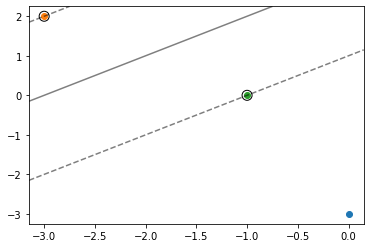

In [93]:
# we create 40 separable points


# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[0][0], X[0][1])
plt.scatter(X[1][0], X[1][1])
plt.scatter(X[2][0], X[2][1])
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [81]:
xk = np.array([[1],[1],[-4]])
wk = np.array([[2/17],[3/17],[-5/17]])
xk.T @ wk


array([[1.47058824]])